Importing packages

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import linear_model as lm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + N

■ Use uniform distribution between 0 and 1 for X

■ Sample N from the normal gaussian distribution

■ Use 10 for train and 10 for test

In [2]:
X = np.random.uniform(0, 1, 20)
N = np.random.normal(0, 1, 20)
Y = np.sin(2*np.pi*X)+N
train_x, test_x = X[:10], X[10:]
train_y, test_y = Y[:10], Y[10:]
train_x, train_y = zip(*sorted(zip(train_x, train_y)))
test_x, test_y = zip(*sorted(zip(test_x, test_y)))

find weights of polynomial regression for order is 0, 1, 3, 9

In [3]:
degree = [0, 1, 3, 9]
weights = []
train_fit = []
test_fit = []
train_error = []
test_error = []
for i in degree:
  poly = pf(degree=i)
  poly_tr_x = poly.fit_transform(np.array(train_x).reshape(-1, 1))
  poly_ts_x = poly.fit_transform(np.array(test_x).reshape(-1, 1))
  pr = lm.LinearRegression()
  pr.fit(poly_tr_x, train_y)
  pred_tr = pr.predict(poly_tr_x)
  pred_ts = pr.predict(poly_ts_x)
  train_error.append((mean_squared_error(train_y, pred_tr))**0.5)
  test_error.append((mean_squared_error(test_y, pred_ts))**0.5)
  train_fit.append(list(pred_tr))
  test_fit.append(list(pred_ts))
  weights.append(pr.coef_)

Display weights in table

In [4]:
weights_new = pd.DataFrame(columns=['name']+['M='+str(i) for i in degree])
for i in range(degree[-1]+1):
  c_dict = {'name':'w'+str(i)}
  for j in range(len(degree)):
    if i < len(weights[j]):
      c_dict['M='+str(degree[j])] = round(weights[j][i], 3)
    else:
      c_dict['M='+str(degree[j])] = np.nan
  weights_new = weights_new.append(c_dict, ignore_index=True)
print(weights_new)

  name  M=0    M=1     M=3           M=9
0   w0  0.0  0.000   0.000  0.000000e+00
1   w1  NaN -2.521  21.165  8.761860e+03
2   w2  NaN    NaN -53.835 -1.479677e+05
3   w3  NaN    NaN  33.103  1.289498e+06
4   w4  NaN    NaN     NaN -6.432489e+06
5   w5  NaN    NaN     NaN  1.918372e+07
6   w6  NaN    NaN     NaN -3.451315e+07
7   w7  NaN    NaN     NaN  3.653363e+07
8   w8  NaN    NaN     NaN -2.089102e+07
9   w9  NaN    NaN     NaN  4.969429e+06


Plots of graphs

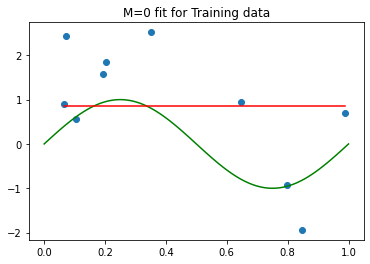

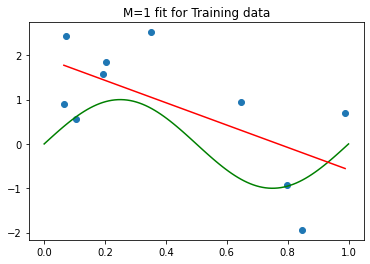

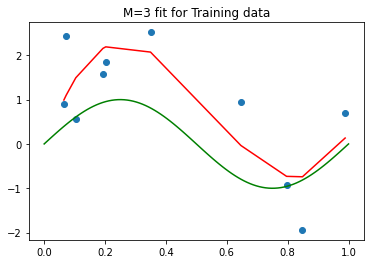

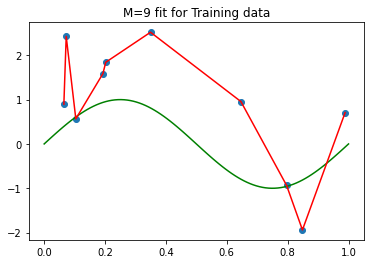

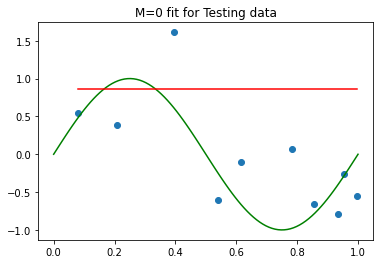

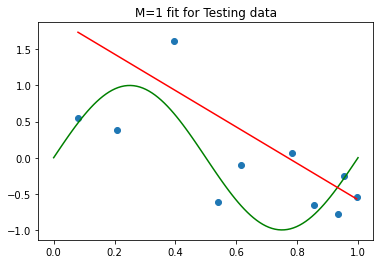

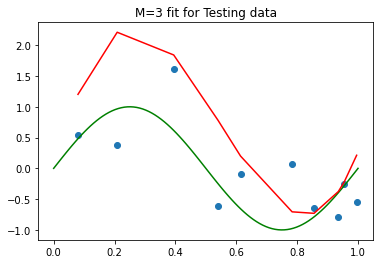

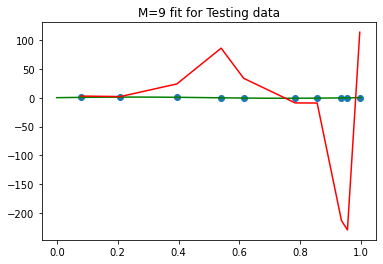

In [5]:
x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)
for i in range(len(train_fit)):
  plt.plot(x, y, 'g')
  plt.scatter(train_x, train_y)
  plt.plot(train_x, train_fit[i], 'r')
  plt.title('M='+str(degree[i])+' fit for Training data')
  plt.show()
for i in range(len(test_fit)):
  plt.clf()
  plt.plot(x, y, 'g')
  plt.scatter(test_x, test_y)
  plt.plot(test_x, test_fit[i],'r')
  plt.title('M='+str(degree[i])+' fit for Testing data')
  plt.show()

Training error vs Testing error

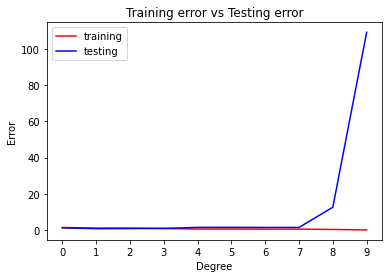

In [6]:
degree = [i for i in range(10)]
train_error = []
test_error = []
for i in degree:
  poly = pf(degree=i)
  poly_tr_x = poly.fit_transform(np.array(train_x).reshape(-1, 1))
  poly_ts_x = poly.fit_transform(np.array(test_x).reshape(-1, 1))
  pr = lm.LinearRegression()
  pr.fit(poly_tr_x, train_y)
  pred_tr = pr.predict(poly_tr_x)
  pred_ts = pr.predict(poly_ts_x)
  train_error.append((mean_squared_error(train_y, pred_tr))**0.5)
  test_error.append((mean_squared_error(test_y, pred_ts))**0.5)
plt.plot([i for i in range(len(train_error))], train_error, color='red', label='training')
plt.plot([i for i in range(len(test_error))], test_error, color='blue', label='testing')
plt.xlabel('Degree')
plt.ylabel('Error')
plt.xticks(degree)
plt.title('Training error vs Testing error')
plt.legend(loc='upper left')
plt.show()

Now generate 100 more data and fit 9th order model and draw fit

In [7]:
X = np.random.uniform(0, 1, 100)
N = np.random.normal(0, 1, 100)
Y = np.sin(2*np.pi*X)+N
train_x, test_x = X[:90], X[90:]
train_y, test_y = Y[:90], Y[90:]
train_x = np.sort(train_x)
test_x = np.sort(test_x)

In [8]:
poly = pf(degree=9)
poly_tr_x = poly.fit_transform(train_x.reshape(-1, 1))
poly_ts_x = poly.fit_transform(test_x.reshape(-1, 1))
pr = lm.LinearRegression()
pr.fit(poly_tr_x, train_y)
pred_tr = pr.predict(poly_tr_x)
pred_ts = pr.predict(poly_ts_x)

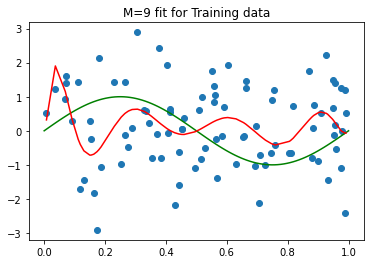

In [9]:
x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)
plt.plot(x, y, 'g')
plt.scatter(train_x, train_y)
plt.plot(train_x, list(pred_tr), 'r')
plt.title('M='+str(9)+' fit for Training data')
plt.show()

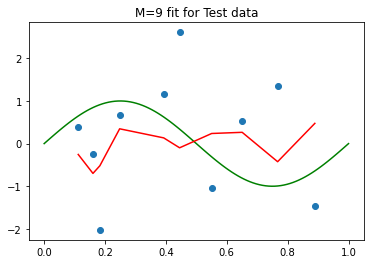

In [10]:
x = np.linspace(0, 1, 100)
y = np.sin(2*np.pi*x)
plt.plot(x, y, 'g')
plt.scatter(test_x, test_y)
plt.plot(test_x, list(pred_ts), 'r')
plt.title('M='+str(9)+' fit for Test data')
plt.show()

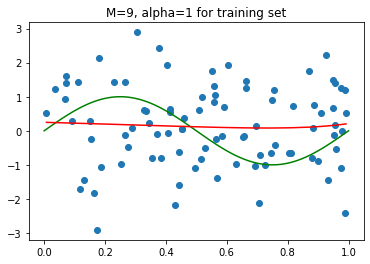

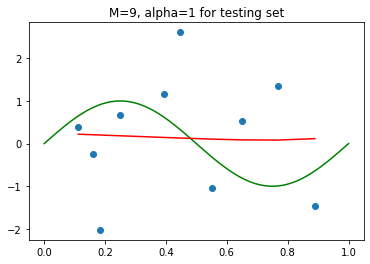

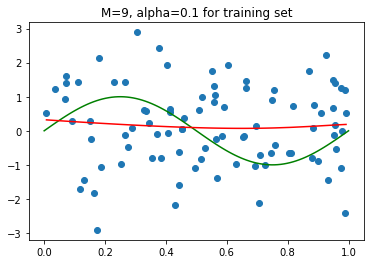

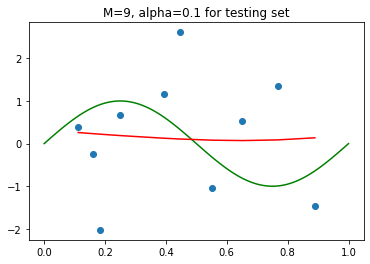

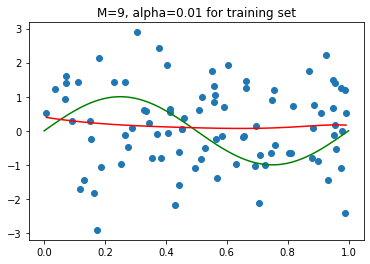

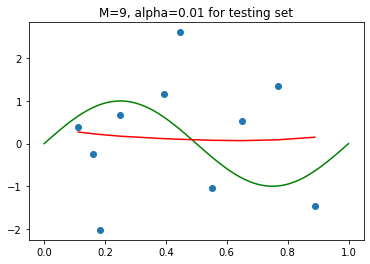

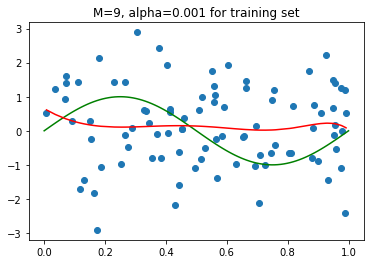

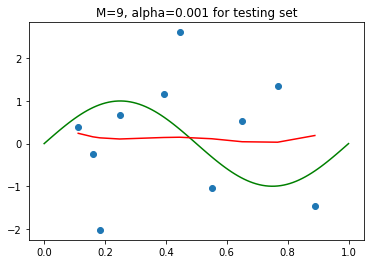

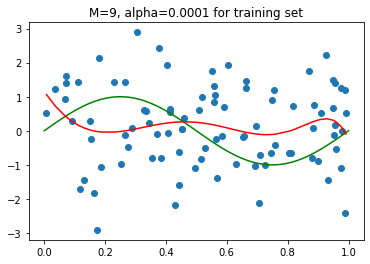

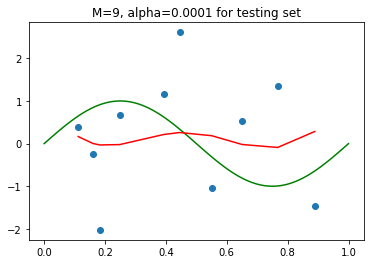

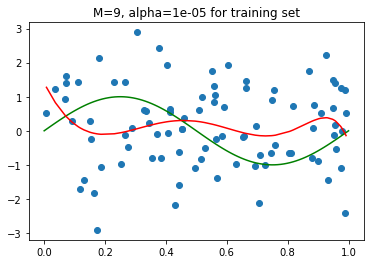

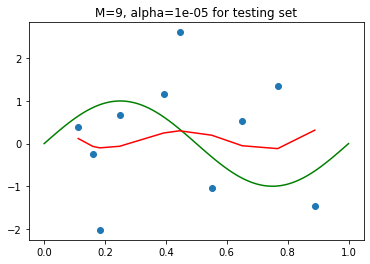

In [11]:
lamb = [1, 1/10, 1/100, 1/1000, 1/10000, 1/100000]
train_error, test_error = [], []
poly = pf(degree=9)
poly_tr_x = poly.fit_transform(train_x.reshape(-1, 1))
poly_ts_x = poly.fit_transform(test_x.reshape(-1, 1))
for i in lamb:
  model = lm.Ridge(alpha=i)
  model.fit(poly_tr_x, train_y)
  x = np.linspace(0, 1, 100)
  y = np.sin(2*np.pi*x)
  plt.plot(x, y, 'g')
  plt.plot(train_x, list(model.predict(poly_tr_x)), 'r')
  plt.scatter(train_x, train_y)
  plt.title('M=9, alpha='+str(i)+' for training set')
  plt.show()
  plt.clf()
  plt.plot(x, y, 'g')
  plt.plot(test_x, list(model.predict(poly_ts_x)), 'r')
  plt.scatter(test_x, test_y)
  plt.title('M=9, alpha='+str(i)+' for testing set')
  plt.show()
  train_error.append(mean_squared_error(train_y, list(model.predict(poly_tr_x)))**0.5)
  test_error.append(mean_squared_error(test_y, list(model.predict(poly_ts_x)))**0.5)

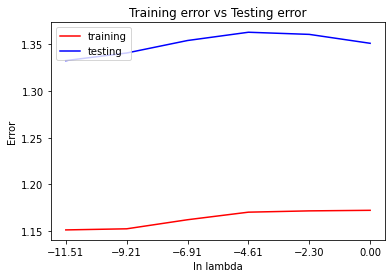

In [12]:
plt.plot(np.log(lamb), train_error, color='red', label='training')
plt.plot(np.log(lamb), test_error, color='blue', label='testing')
plt.xlabel('ln lambda')
plt.ylabel('Error')
plt.xticks(np.log(lamb))
plt.title('Training error vs Testing error')
plt.legend(loc='upper left')
plt.show()

The best model in terms of degree perspective is the best model would be degree=3. In terms of alpha perspective the best model would be degree=9 and alpha=1/100000.